<a href="https://colab.research.google.com/github/Sonal-2000/LGMVIP-DataScience/blob/main/Task_1_Stock_Market_Prediction_And_Forecasting_Using_Stacked_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**LetsGrowMore :- Data Science #dec2021**

Name :- Sonal Sudhir Jathar

Task 1 :- Stock Market Prediction And Forecasting Using Stacked LSTM

Level :- Beginner

Environment :- Google Colab Notebook

Datasetlink : https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv


In [ ]:
# importing data science libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import pandas_datareader as pddr
import tensorflow as tsf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [ ]:
# loading dataset
url = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv'
df = pd.read_csv(url)

In [ ]:
# print first 5 values sorted by date
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [ ]:
# print last 5 values
df.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [ ]:
df.shape

(2035, 8)

In [ ]:
# print information about dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [ ]:
# print statistical summary of dataframe
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [ ]:
#reset current index of dataframe
df1=df.reset_index()['Close']

In [ ]:
df1

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

In [ ]:
df1.shape

(2035,)

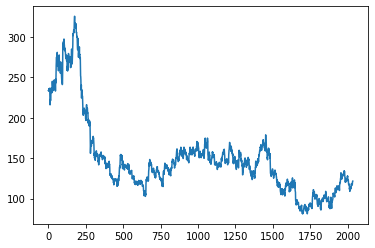

In [ ]:
plt.plot(df1)

Using scaler to reduce the scale of the dataset to save solver timer

In [ ]:
scaler = MinMaxScaler(feature_range = (0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
df1.shape

(2035, 1)

In [ ]:
print(df1)

[[0.62418301]
 [0.62214052]
 [0.62622549]
 ...
 [0.1621732 ]
 [0.16319444]
 [0.16584967]]


In [ ]:
#break database into train and test range
training_range = int(len(df1)*0.70)
test_range = len(df1) - training_range
train_data, test_data = df1[0:training_range,:], df1[training_range:len(df1),:1]

In [ ]:
training_range

1424

In [ ]:
test_range

611

In [ ]:
print(train_data)

[[0.62418301]
 [0.62214052]
 [0.62622549]
 ...
 [0.32618464]
 [0.32271242]
 [0.3247549 ]]


In [ ]:
# covert array list into dataset matrix
def create_dataset(dataset, time_interval = 1):
    dataL, dataR = [], []
    for i in range(len(dataset) - time_interval - 1):
        a = dataset[i:(i+time_interval), 0]
        dataL.append(a)
        dataR.append(dataset[i+time_interval,0])
    return np.array(dataL), np.array(dataR)   

In [ ]:
# Reshape into L=t,t=1 and R=t+3
time_interval = 100
L_train, R_train = create_dataset(train_data, time_interval)
L_test, R_test = create_dataset(test_data, time_interval)

In [ ]:
# Reshape the input to desired requirement of LSTM
L_train = L_train.reshape(L_train.shape[0], L_train.shape[1],1)
L_test = L_test.reshape(L_test.shape[0], L_test.shape[1],1)

In [ ]:
print(L_train)

[[[0.62418301]
  [0.62214052]
  [0.62622549]
  ...
  [0.83455882]
  [0.86213235]
  [0.85273693]]

 [[0.62214052]
  [0.62622549]
  [0.63378268]
  ...
  [0.86213235]
  [0.85273693]
  [0.87111928]]

 [[0.62622549]
  [0.63378268]
  [0.62234477]
  ...
  [0.85273693]
  [0.87111928]
  [0.84497549]]

 ...

 [[0.26041667]
  [0.2563317 ]
  [0.24652778]
  ...
  [0.33415033]
  [0.33986928]
  [0.34681373]]

 [[0.2563317 ]
  [0.24652778]
  [0.23611111]
  ...
  [0.33986928]
  [0.34681373]
  [0.3500817 ]]

 [[0.24652778]
  [0.23611111]
  [0.25204248]
  ...
  [0.34681373]
  [0.3500817 ]
  [0.32618464]]]


In [ ]:
print(R_train)

[0.87111928 0.84497549 0.84027778 ... 0.3500817  0.32618464 0.32271242]


In [ ]:
print(L_test.shape),print(R_test.shape)

(510, 100, 1)
(510,)


(None, None)

Creating the LSTM Stacked model

In [ ]:
tsf.__version__

'2.7.0'

In [ ]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))

In [ ]:
model.compile(loss = 'mean_squared_error',optimizer= 'adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(L_train, R_train, validation_data = (L_test, R_test), epochs = 50, batch_size = 64, verbose = 1)

21/21 [==============================] - 7s 349ms/step - loss: 6.5600e-04 - val_loss: 8.2135e-04
Epoch 32/50
21/21 [==============================] - 7s 347ms/step - loss: 6.0127e-04 - val_loss: 7.4285e-04
Epoch 33/50
21/21 [==============================] - 7s 343ms/step - loss: 6.2424e-04 - val_loss: 5.4820e-04
Epoch 34/50
21/21 [==============================] - 7s 346ms/step - loss: 6.2277e-04 - val_loss: 6.0805e-04
Epoch 35/50
21/21 [==============================] - 7s 346ms/step - loss: 6.1101e-04 - val_loss: 6.7513e-04
Epoch 36/50
21/21 [==============================] - 7s 347ms/step - loss: 5.5827e-04 - val_loss: 6.9074e-04
Epoch 37/50
21/21 [==============================] - 7s 345ms/step - loss: 5.4617e-04 - val_loss: 6.7053e-04
Epoch 38/50
21/21 [==============================] - 7s 346ms/step - loss: 6.0277e-04 - val_loss: 5.9073e-04
Epoch 39/50
21/21 [==============================] - 7s 344ms/step - loss: 5.2067e-04 - val_loss: 6.7595e-04
Epoch 40/50
21/21 [============

In [ ]:
# Try to do prediction
train_predict = model.predict(L_train)
test_predict = model.predict(L_test)

In [ ]:
# Rescale our data to original scale to do the analysis
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [ ]:
# Calculate the RMS performance
import math
math.sqrt(mean_squared_error(R_train, train_predict))

163.96587513532066

In [ ]:
# Test the dataset for RSM
math.sqrt(mean_squared_error(R_test, test_predict))

109.0015602574633

Result Plotting

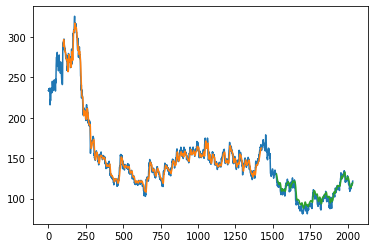

In [ ]:
#Train prediction for plotting
look_back = 100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict

#Train prediction for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2)+1:len(df1) - 1, :] = test_predict

#plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
len(test_data), L_test.shape

(611, (510, 100, 1))

In [ ]:
L_input = test_data[511:].reshape(1,-1)
L_input.shape

(1, 100)

In [ ]:
temp_input = list(L_input)
temp_input = temp_input[0].tolist()

In [ ]:
temp_input

[0.12479575163398693,
 0.1384803921568627,
 0.14011437908496732,
 0.1388888888888889,
 0.13541666666666663,
 0.14011437908496732,
 0.13807189542483655,
 0.130718954248366,
 0.130718954248366,
 0.12867647058823528,
 0.11846405228758167,
 0.14644607843137253,
 0.1480800653594771,
 0.159109477124183,
 0.15992647058823523,
 0.1578839869281045,
 0.16441993464052285,
 0.178921568627451,
 0.17933006535947704,
 0.19260620915032678,
 0.2081290849673203,
 0.18974673202614378,
 0.18055555555555558,
 0.1823937908496731,
 0.17708333333333326,
 0.17810457516339862,
 0.18055555555555558,
 0.17810457516339862,
 0.17851307189542487,
 0.196078431372549,
 0.18913398692810457,
 0.1895424836601307,
 0.19403594771241828,
 0.19444444444444442,
 0.20200163398692816,
 0.19771241830065356,
 0.19934640522875813,
 0.19873366013071891,
 0.19975490196078427,
 0.21282679738562094,
 0.21568627450980393,
 0.2044526143790849,
 0.21772875816993464,
 0.21098856209150318,
 0.21425653594771243,
 0.1975081699346406,
 0.1881

Indicate the prediction for next 30 days

In [ ]:
lst_output=[]
n_steps=100
nextNumberOfDays = 30
i=0

while(i<nextNumberOfDays):
  if(len(temp_input)>100):
    L_input=np.array(temp_input[1:])
    print("{} day input {}".format(i,L_input))
    L_input = L_input.reshape(1,-1)
    L_input = L_input.reshape(1, n_steps, 1)
    yhat = model.predict(L_input, verbose = 0)
    print("{} day input {}".format(i,yhat))
    temp_input.extend(yhat[0].tolist())
    temp_input = temp_input[1:]
    lst_output.extend(yhat.tolist())
    i = i+1
  else:
    L_input = L_input.reshape(1, n_steps, 1)
    yhat = model.predict(L_input, verbose = 0)
    print(yhat[0])
    temp_input.extend(yhat[0].tolist())
    print(len(temp_input))
    lst_output.extend(yhat.tolist())
    i = i+1




[0.16110452]
101
1 day input [0.13848039 0.14011438 0.13888889 0.13541667 0.14011438 0.1380719
 0.13071895 0.13071895 0.12867647 0.11846405 0.14644608 0.14808007
 0.15910948 0.15992647 0.15788399 0.16441993 0.17892157 0.17933007
 0.19260621 0.20812908 0.18974673 0.18055556 0.18239379 0.17708333
 0.17810458 0.18055556 0.17810458 0.17851307 0.19607843 0.18913399
 0.18954248 0.19403595 0.19444444 0.20200163 0.19771242 0.19934641
 0.19873366 0.1997549  0.2128268  0.21568627 0.20445261 0.21772876
 0.21098856 0.21425654 0.19750817 0.18811275 0.17851307 0.17381536
 0.16033497 0.16564542 0.17116013 0.17422386 0.18035131 0.17401961
 0.16278595 0.16973039 0.17810458 0.17034314 0.16830065 0.17279412
 0.17544935 0.18382353 0.19138072 0.18913399 0.19097222 0.17238562
 0.16830065 0.1693219  0.17177288 0.16156046 0.14971405 0.1503268
 0.15196078 0.14726307 0.14501634 0.14603758 0.12479575 0.13112745
 0.11397059 0.1190768  0.12377451 0.13562092 0.12908497 0.13459967
 0.12806373 0.13031046 0.12724673 0

Assigning Time Interval Of Predictions

In [ ]:
import numpy as nm
day_new = nm.arange(1,101)
day_pred = nm.arange(101,131)

In [ ]:
len(df1)

2035

Prediction for 30 days is shown by Orange lines

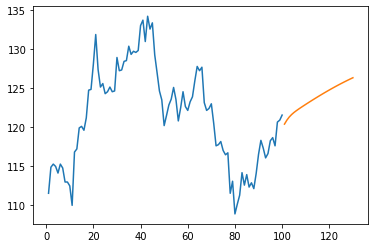

In [ ]:
import matplotlib.pyplot as lib
lib.plot(day_new, scaler.inverse_transform(df1[1935:]))
lib.plot(day_pred, scaler.inverse_transform(lst_output))

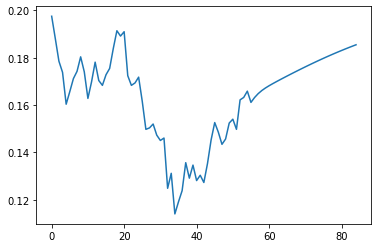

In [ ]:
dfd = df1.tolist()
dfd.extend(lst_output)
plt.plot(dfd[1980:])

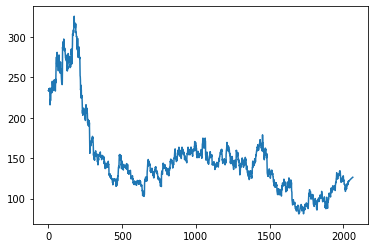

In [ ]:
dfd = scaler.inverse_transform(dfd).tolist()
lib.plot(dfd)

Thank You